In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/league-of-legends-champion-data/200125_LoL_champion_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/league-of-legends-champion-data/200125_LoL_champion_data.csv")

In [3]:
df.head()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,4800,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,3150,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,3150,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,4800,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,1350,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [5]:
df.isnull().sum()

Unnamed: 0              0
id                      0
apiname                 0
title                   0
difficulty              0
herotype                0
alttype                28
resource                5
stats                   0
rangetype               0
date                    0
patch                   0
changes                 0
role                    0
client_positions        0
external_positions      0
damage                  0
toughness               0
control                 0
mobility                0
utility                 0
style                   0
adaptivetype            0
be                      0
rp                      0
skill_i                 0
skill_q                 0
skill_w                 0
skill_e                 0
skill_r                 0
skills                  2
fullname              129
nickname              158
dtype: int64

In [6]:
df = df.drop(columns=['nickname', 'fullname', 'id', 'skill_i', 'skill_q', 'skill_w', 'skill_e', 'skill_r', 'skills'], axis=1)

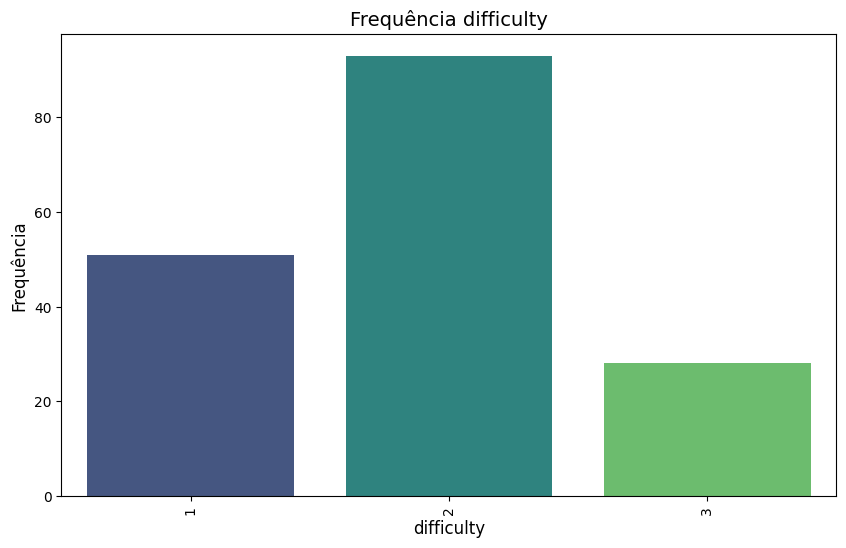

Frequência da coluna difficulty:
   difficulty  Frequência
0           2          93
1           1          51
2           3          28


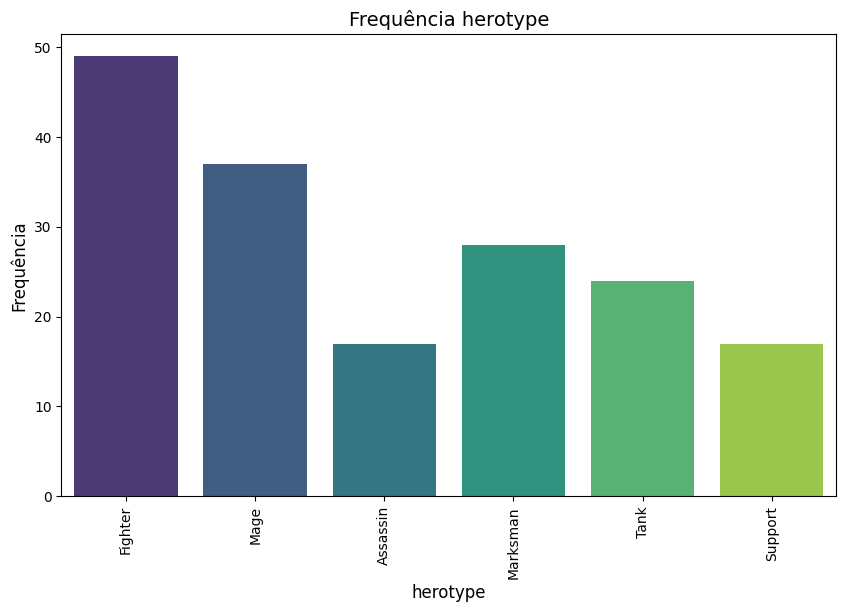

Frequência da coluna herotype:
   herotype  Frequência
0   Fighter          49
1      Mage          37
2  Marksman          28
3      Tank          24
4  Assassin          17
5   Support          17


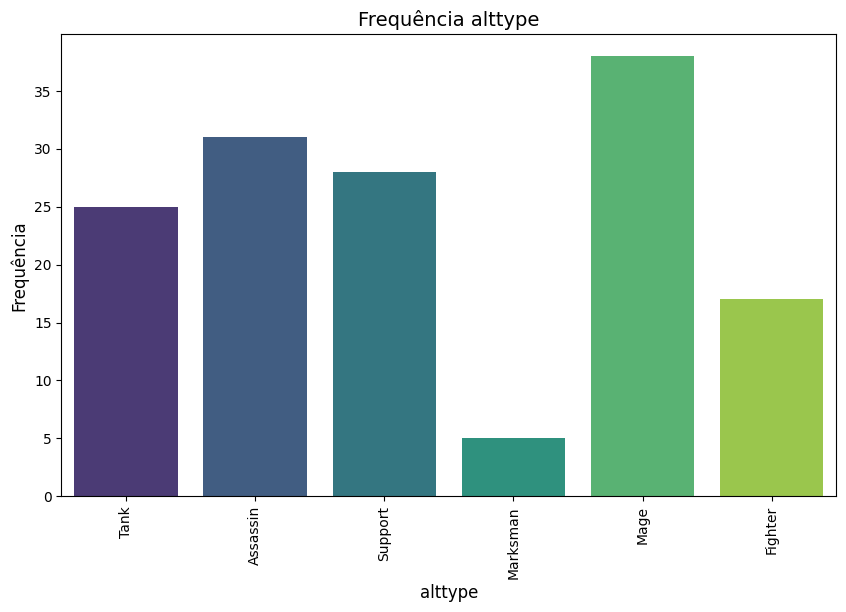

Frequência da coluna alttype:
    alttype  Frequência
0      Mage          38
1  Assassin          31
2   Support          28
3      Tank          25
4   Fighter          17
5  Marksman           5


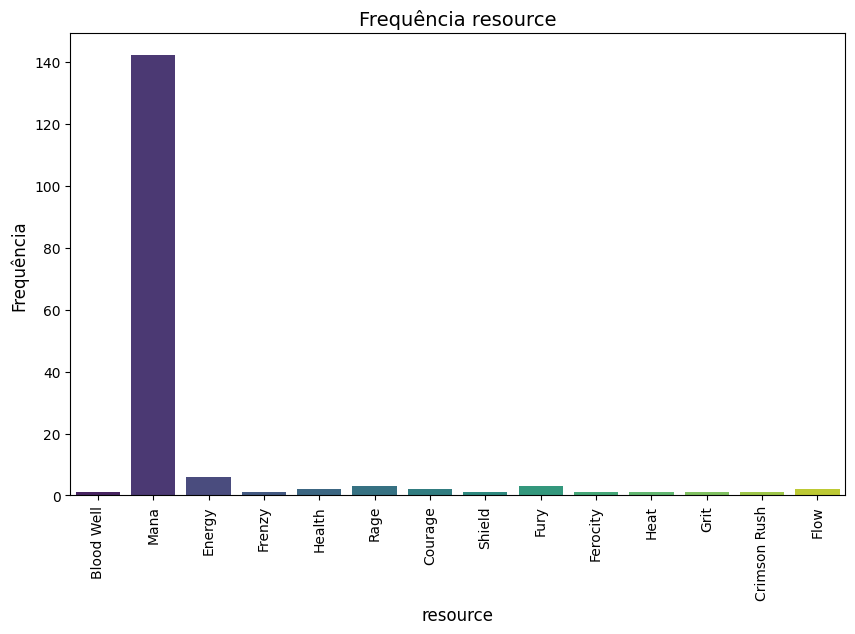

Frequência da coluna resource:
        resource  Frequência
0           Mana         142
1         Energy           6
2           Rage           3
3           Fury           3
4         Health           2
5        Courage           2
6           Flow           2
7     Blood Well           1
8         Frenzy           1
9         Shield           1
10      Ferocity           1
11          Heat           1
12          Grit           1
13  Crimson Rush           1


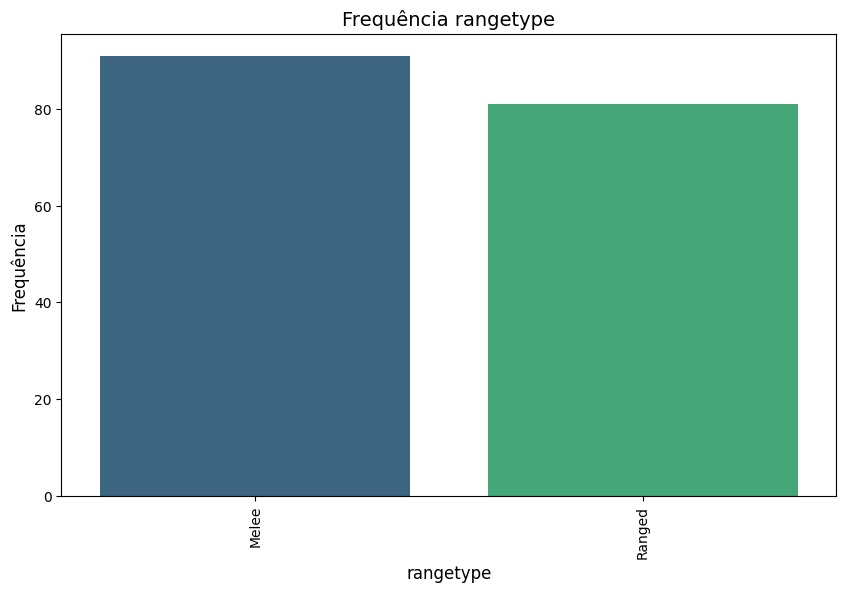

Frequência da coluna rangetype:
  rangetype  Frequência
0     Melee          91
1    Ranged          81


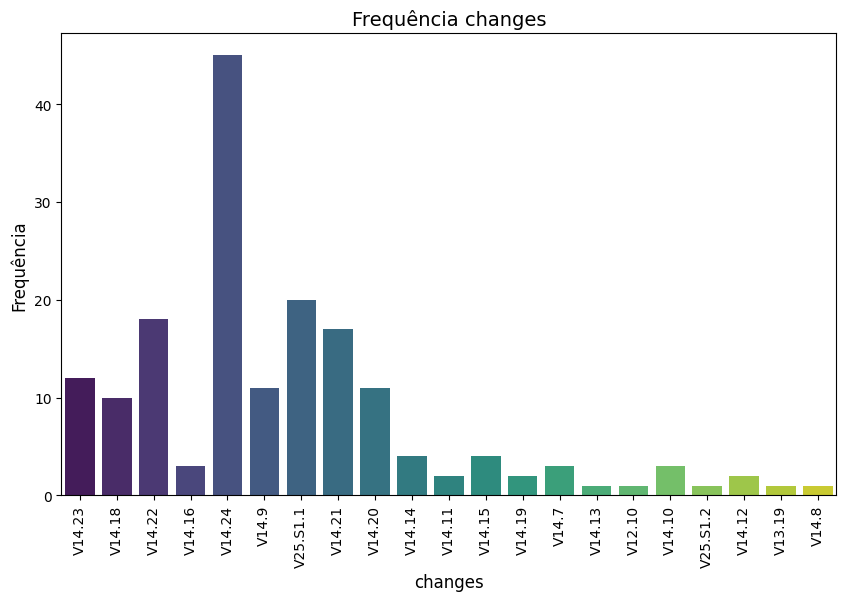

Frequência da coluna changes:
     changes  Frequência
0     V14.24          45
1   V25.S1.1          20
2     V14.22          18
3     V14.21          17
4     V14.23          12
5      V14.9          11
6     V14.20          11
7     V14.18          10
8     V14.14           4
9     V14.15           4
10    V14.10           3
11    V14.16           3
12     V14.7           3
13    V14.12           2
14    V14.11           2
15    V14.19           2
16    V12.10           1
17    V14.13           1
18  V25.S1.2           1
19    V13.19           1
20     V14.8           1


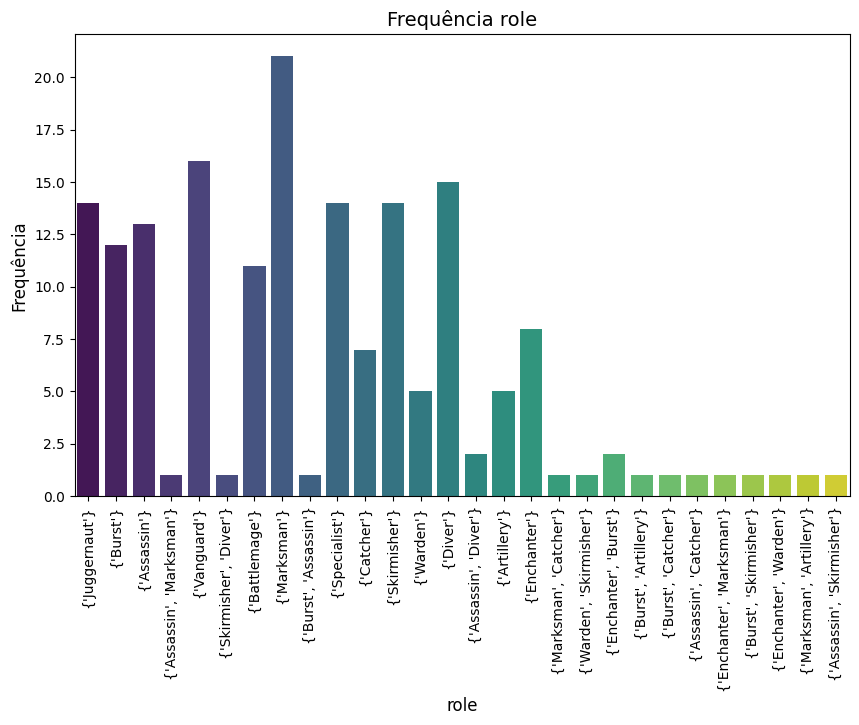

Frequência da coluna role:
                          role  Frequência
0                 {'Marksman'}          21
1                 {'Vanguard'}          16
2                    {'Diver'}          15
3               {'Juggernaut'}          14
4               {'Specialist'}          14
5               {'Skirmisher'}          14
6                 {'Assassin'}          13
7                    {'Burst'}          12
8               {'Battlemage'}          11
9                {'Enchanter'}           8
10                 {'Catcher'}           7
11               {'Artillery'}           5
12                  {'Warden'}           5
13      {'Enchanter', 'Burst'}           2
14       {'Assassin', 'Diver'}           2
15       {'Burst', 'Assassin'}           1
16     {'Skirmisher', 'Diver'}           1
17     {'Marksman', 'Catcher'}           1
18    {'Warden', 'Skirmisher'}           1
19    {'Assassin', 'Marksman'}           1
20      {'Burst', 'Artillery'}           1
21        {'Burst', 'Catche

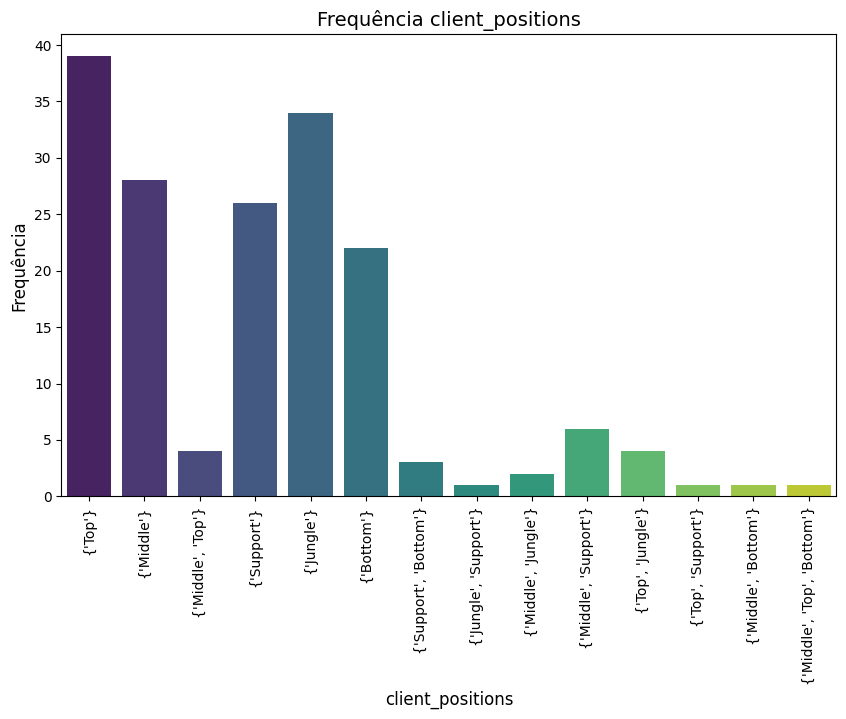

Frequência da coluna client_positions:
               client_positions  Frequência
0                       {'Top'}          39
1                    {'Jungle'}          34
2                    {'Middle'}          28
3                   {'Support'}          26
4                    {'Bottom'}          22
5         {'Middle', 'Support'}           6
6             {'Middle', 'Top'}           4
7             {'Top', 'Jungle'}           4
8         {'Support', 'Bottom'}           3
9          {'Middle', 'Jungle'}           2
10        {'Jungle', 'Support'}           1
11           {'Top', 'Support'}           1
12         {'Middle', 'Bottom'}           1
13  {'Middle', 'Top', 'Bottom'}           1


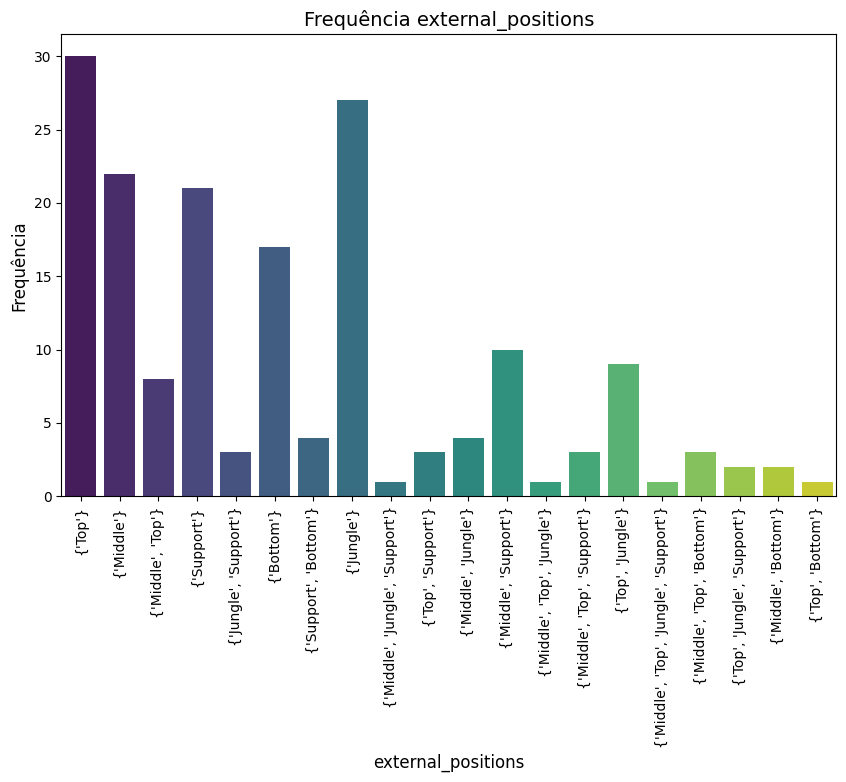

Frequência da coluna external_positions:
                        external_positions  Frequência
0                                  {'Top'}          30
1                               {'Jungle'}          27
2                               {'Middle'}          22
3                              {'Support'}          21
4                               {'Bottom'}          17
5                    {'Middle', 'Support'}          10
6                        {'Top', 'Jungle'}           9
7                        {'Middle', 'Top'}           8
8                     {'Middle', 'Jungle'}           4
9                    {'Support', 'Bottom'}           4
10                      {'Top', 'Support'}           3
11            {'Middle', 'Top', 'Support'}           3
12                   {'Jungle', 'Support'}           3
13             {'Middle', 'Top', 'Bottom'}           3
14            {'Top', 'Jungle', 'Support'}           2
15                    {'Middle', 'Bottom'}           2
16         {'Middle', 'J

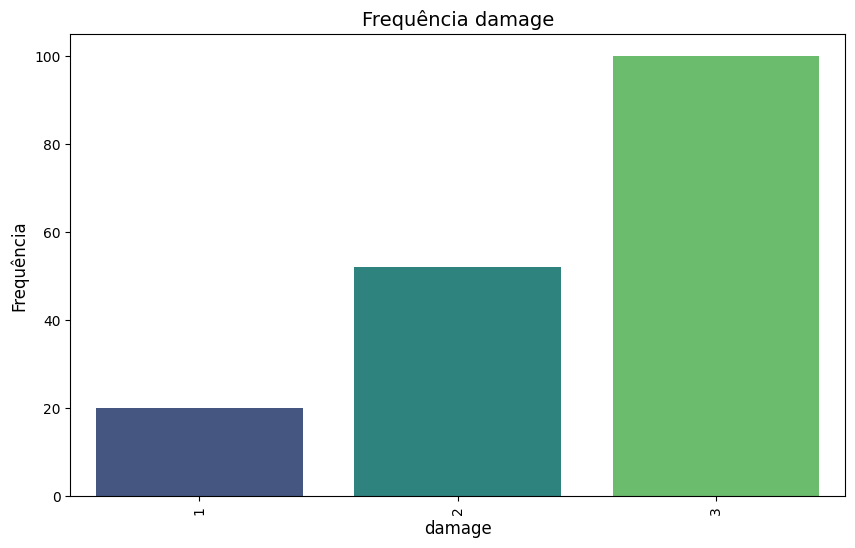

Frequência da coluna damage:
   damage  Frequência
0       3         100
1       2          52
2       1          20


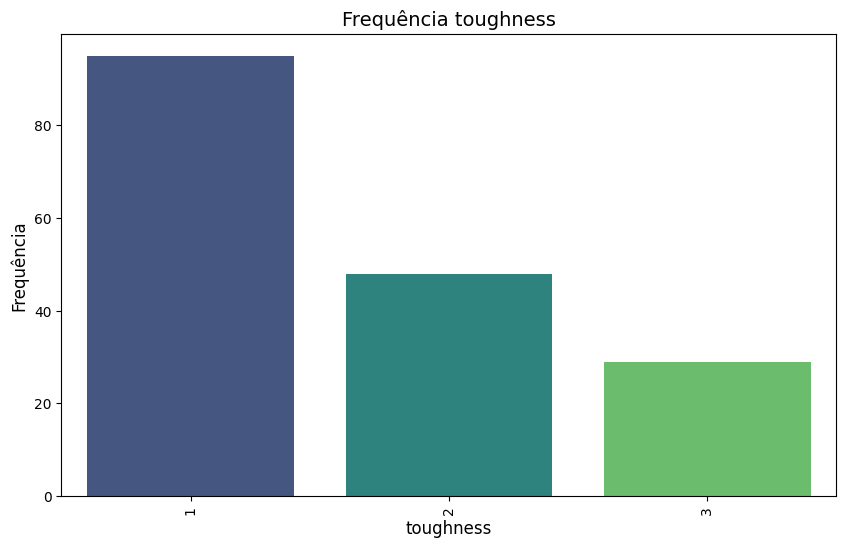

Frequência da coluna toughness:
   toughness  Frequência
0          1          95
1          2          48
2          3          29


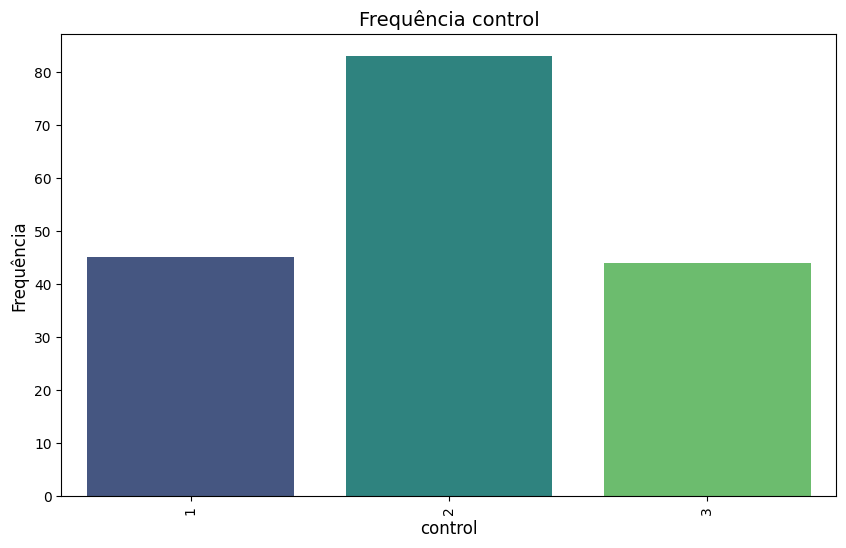

Frequência da coluna control:
   control  Frequência
0        2          83
1        1          45
2        3          44


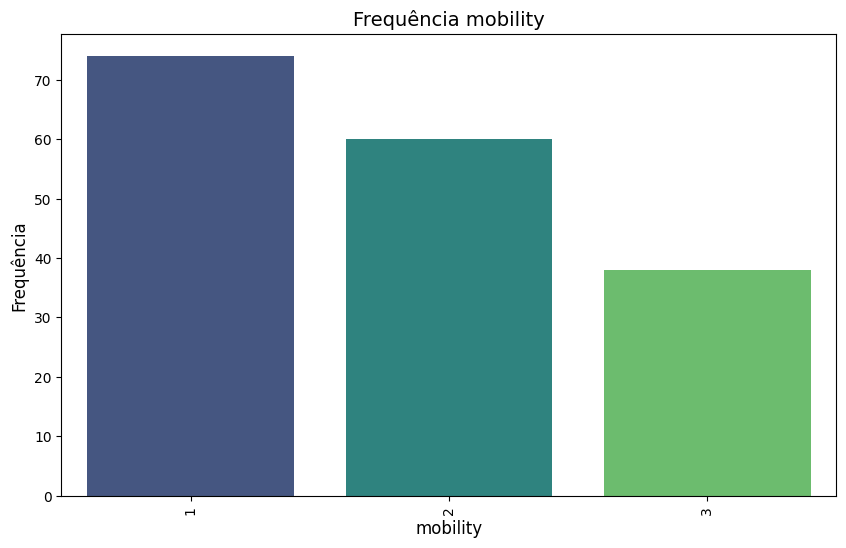

Frequência da coluna mobility:
   mobility  Frequência
0         1          74
1         2          60
2         3          38


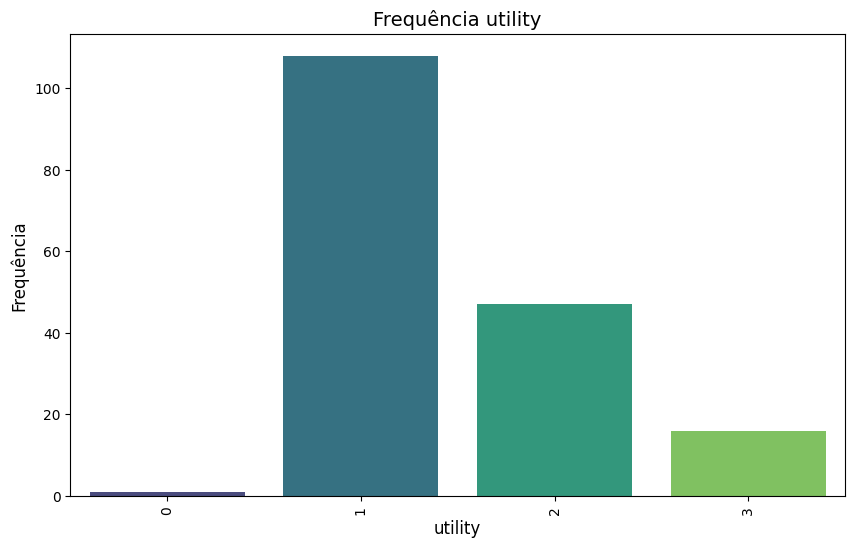

Frequência da coluna utility:
   utility  Frequência
0        1         108
1        2          47
2        3          16
3        0           1


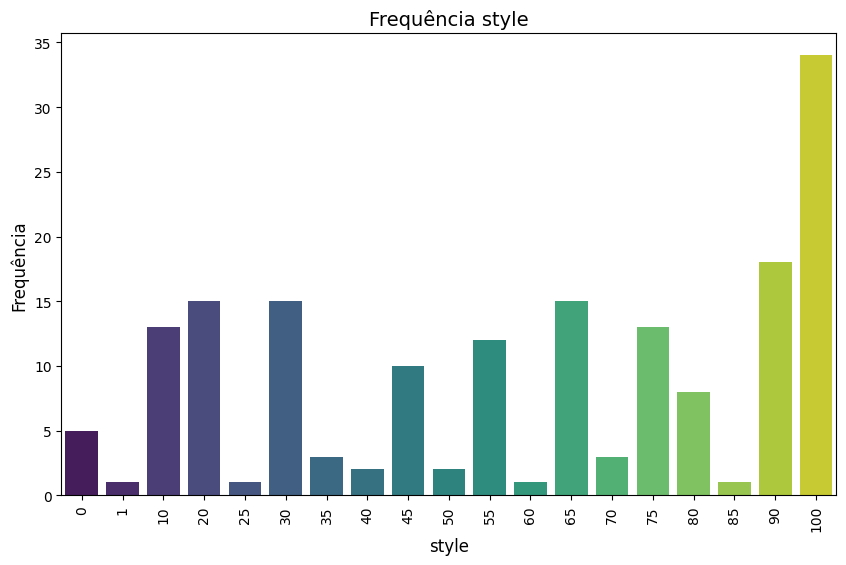

Frequência da coluna style:
    style  Frequência
0     100          34
1      90          18
2      20          15
3      30          15
4      65          15
5      10          13
6      75          13
7      55          12
8      45          10
9      80           8
10      0           5
11     70           3
12     35           3
13     50           2
14     40           2
15      1           1
16     25           1
17     60           1
18     85           1


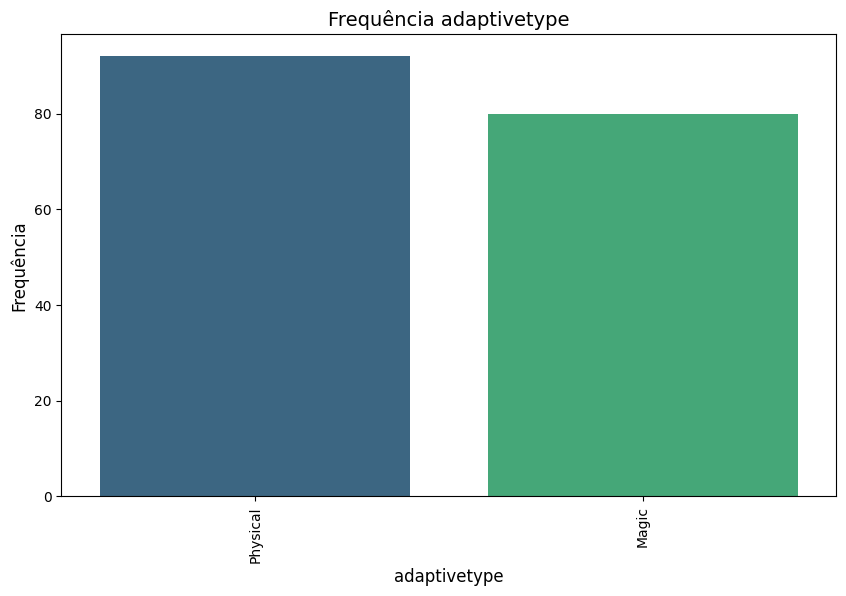

Frequência da coluna adaptivetype:
  adaptivetype  Frequência
0     Physical          92
1        Magic          80


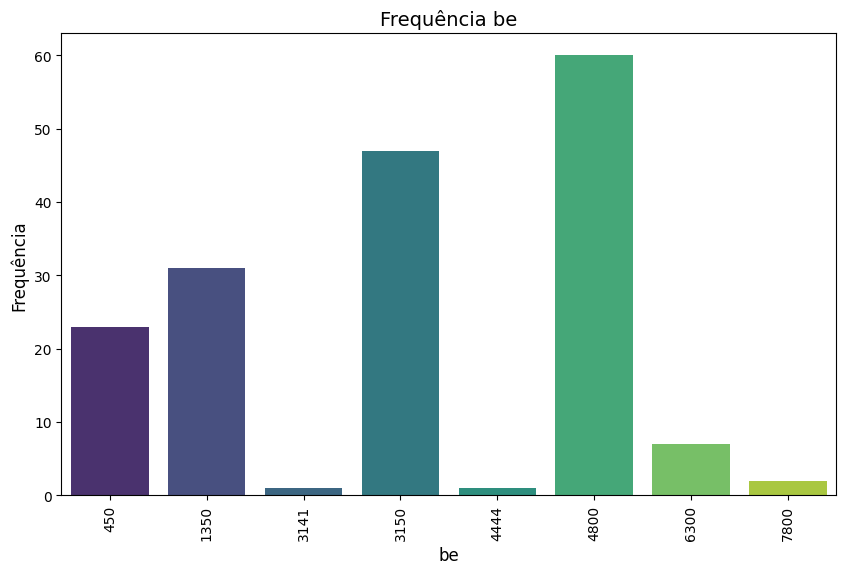

Frequência da coluna be:
     be  Frequência
0  4800          60
1  3150          47
2  1350          31
3   450          23
4  6300           7
5  7800           2
6  4444           1
7  3141           1


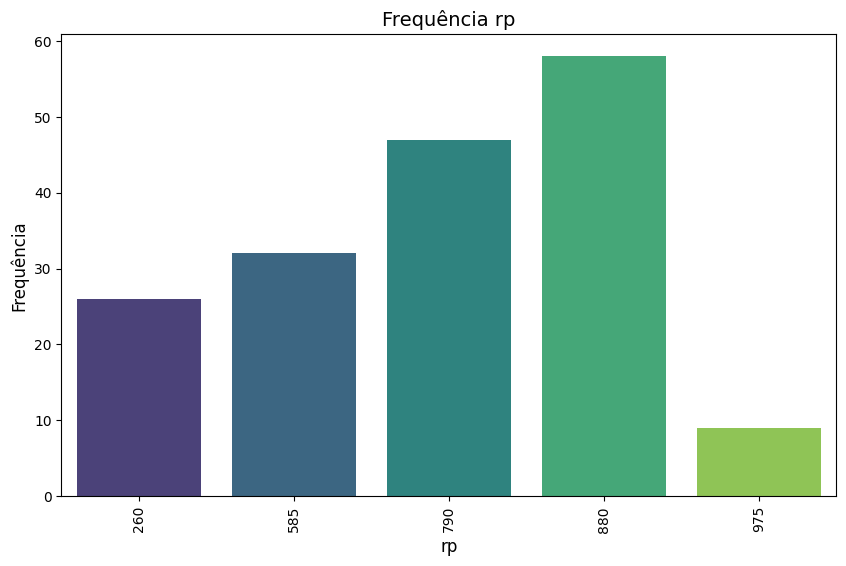

Frequência da coluna rp:
    rp  Frequência
0  880          58
1  790          47
2  585          32
3  260          26
4  975           9


In [7]:
# Defina a lista de colunas a serem puladas
colunas_para_pular = ['Unnamed: 0', 'id', 'apiname', 'title', 'stats', 'date', 'patch', 'skill_i', 'skill_q', 'skill_w', 'skill_e', 'skill_r', 'skills']

# Itera pelas colunas do DataFrame
for coluna in df.columns:
    # Se a coluna estiver na lista de colunas a serem puladas, pula a iteração
    if coluna in colunas_para_pular:
        continue
    
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    # Conta a frequência dos valores na coluna
    qtd = df[coluna].value_counts().reset_index(name='Frequência')
    qtd.columns = [coluna, 'Frequência']
    
    # Imprime as frequências
    print(f'Frequência da coluna {coluna}:')
    print(qtd)


# ML

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [9]:
# Tratamento dos valores nulos encontrados
df_clean = df.dropna()

# Usaremos LabelEncoder para transformar a variável alvo 'rangetype' e qualquer outra coluna categórica
le = LabelEncoder()

# Codificar a variável alvo 'rangetype'
df_clean['rangetype'] = le.fit_transform(df_clean['rangetype'])

# Para as variáveis independentes (colunas categóricas), aplicamos o mesmo encoding
for coluna in df_clean.select_dtypes(include=['object']).columns:
    if coluna != 'rangetype':  # Não codificamos a variável alvo
        df_clean[coluna] = le.fit_transform(df_clean[coluna])

In [10]:
# Separar as features (X) e o alvo (y)
X = df_clean.drop('rangetype', axis=1)  # Features (todas as colunas, exceto 'rangetype')
y = df_clean['rangetype']  # Variável alvo (rangetype)

# Dividir os dados em treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Treinar o modelo (Random Forest como exemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

In [12]:
# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))


Acurácia: 0.9642857142857143
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      1.00      0.96        13

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [13]:
# Avaliar o modelo com validação cruzada (para ver a estabilidade)
cross_val = cross_val_score(model, X, y, cv=5)
print(f'Acurácia média com validação cruzada: {cross_val.mean()}')


Acurácia média com validação cruzada: 0.9142857142857144
